# <div align="center">Lead Scoring Case Study</div>


## Libraries and Data Loading

In [1]:
# Suppress unnecessary warnings to improve readability
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [3]:
# Load the dataset
df = pd.read_csv('Leads.csv')

## Exploratory Data Analysis (EDA)

### Initial Examination

In [4]:
# Display the first few rows
df.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Get dataset dimensions
df.shape

(9240, 37)

In [6]:
# List all column names
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# Summary statistics
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Handle Missing Values

In [9]:
# Check missing values in each column
print("\nMissing Values Count:\n", df.isnull().sum().sort_values(ascending=False))


Missing Values Count:
 Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I ag

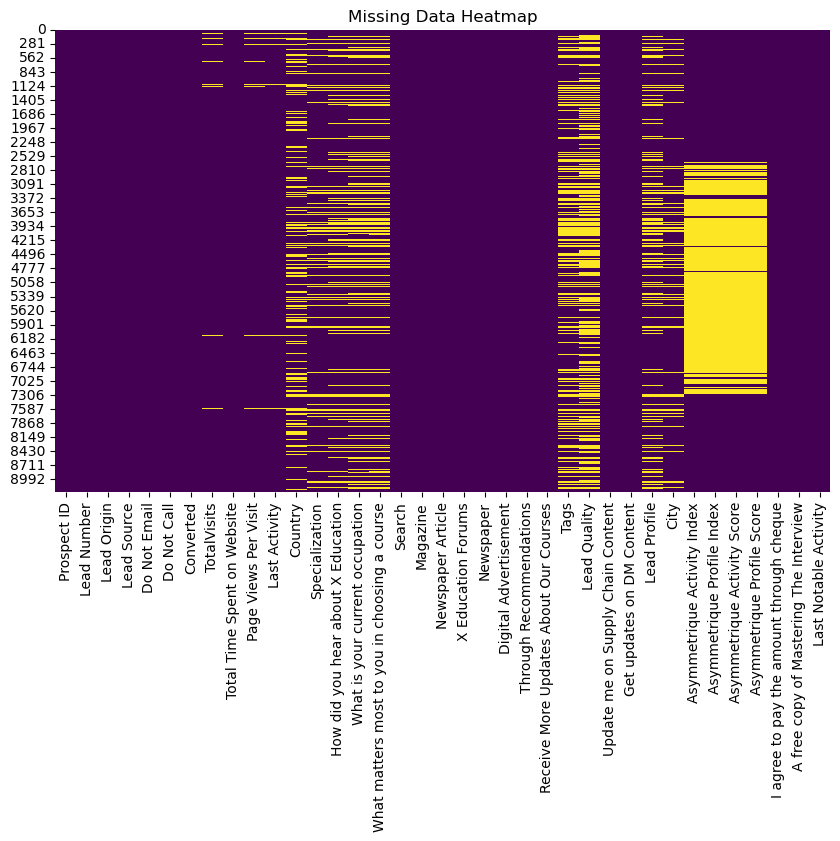

In [10]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

### Data Cleaning

As we can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9240 datapoints in our dataframe, let's eliminate the columns having greater than 30% missing values as they are of no use to us.

In [11]:
# Dropping columns with extreme missing values (>30%)
for col in df.columns:
    if df[col].isnull().sum() > 9240 * 0.3:
        df.drop(col, axis=1, inplace=True)

In [12]:
# Check for null values in each column
df.isnull().sum().sort_values(ascending = False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

We can see that there are several columns containing a level labeled 'Select.' This indicates that the student did not choose an option for that specific column, resulting in the display of 'Select.' These entries are effectively equivalent to missing values. Therefore, we need to determine the count of occurrences of the 'Select' level in all relevant columns.

In [13]:
# Get the value counts of all the columns

for col in df.columns:
    print(df[col].astype('category').value_counts())
    print('-'*50)

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
--

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
Name: count, dtype: int64
--------------------------------------------------


                                               Missing Values  Percentage
What matters most to you in choosing a course            2709   29.318182
Lead Profile                                             2709   29.318182
What is your current occupation                          2690   29.112554
Country                                                  2461   26.634199
How did you hear about X Education                       2207   23.885281
Specialization                                           1438   15.562771
City                                                     1420   15.367965
TotalVisits                                               137    1.482684
Page Views Per Visit                                      137    1.482684
Last Activity                                             103    1.114719
Lead Source                                                36    0.389610


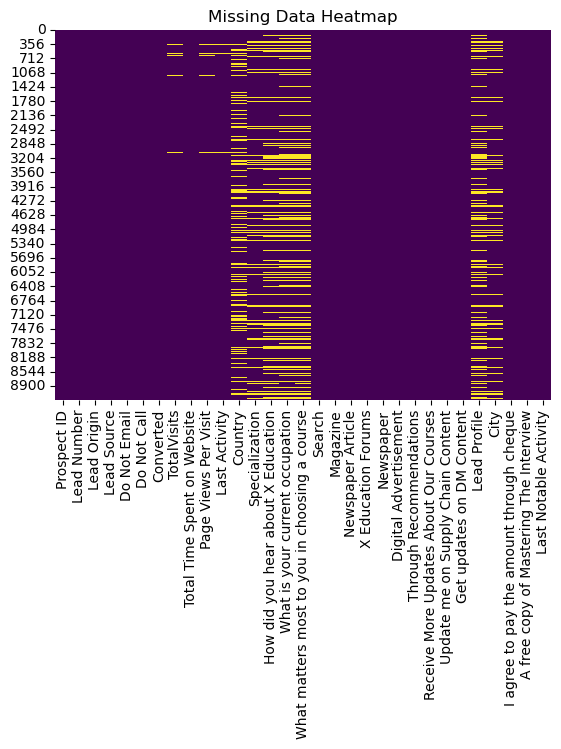

In [14]:
# Count missing values per column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print(missing_df)

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

###### Dropping columns with excessive missing data and handling others based on thresholds or significance.

### Data Cleaning and Column Removal

As we can see that the levels **"Lead Profile"** and **"How did you hear about X Education"** contain a significant number of rows with the value "Select," which is not useful for our analysis. Therefore, we decided to remove these columns.

Additionally, upon reviewing the value counts for all columns, we noticed that several columns predominantly feature a single value across all data points. These include:

- **"Do Not Call"**  
- **"Search"**  
- **"Magazine"**  
- **"Newspaper Article"**  
- **"X Education Forums"**  
- **"Newspaper"**  
- **"Digital Advertisement"**  
- **"Through Recommendations"**  
- **"Receive More Updates About Our Courses"**  
- **"Update me on Supply Chain Content"**  
- **"Get updates on DM Content"**  
- **"I agree to pay the amount through cheque"**  

Since nearly all values for these variables are "No," I believe it is best to eliminate these columns as they will not contribute to our analysis.

Furthermore, the variable **"What matters most to you in choosing a course"** shows that **"Better Career Prospects"** appears 6,528 times, while the other two levels appear only once or twice. Thus, we decided to drop this column as well.

The column **"What is your current occupation"** contains many null values. While we could drop the entire row, we have already lost numerous feature variables. Therefore, I chose to retain this column as it may prove significant in our analysis. Instead, I removed only the null rows for **"What is your current occupation."**

Finally, it is clear that the variables **"Prospect ID"** and **"Lead Number"** will not be useful for the analysis. We removed these two variables to streamline our dataset.


In [15]:
# Coulmns to drop
columns_to_drop = ['City', 'Country', 'Prospect ID', 'Lead Number']

df = df.drop(columns=columns_to_drop, axis=1)


# Dropping columns with a high number of "Select" values
columns_to_drop_due_to_select = ['Lead Profile', 'How did you hear about X Education']

# Dropping columns with only one major value present
columns_with_single_majority_values = [
    'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
    'Newspaper', 'Digital Advertisement', 'Through Recommendations',
    'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
    'Get updates on DM Content', 'I agree to pay the amount through cheque','What matters most to you in choosing a course'
]

# Combine all columns to drop
columns_to_drop = columns_to_drop_due_to_select + columns_with_single_majority_values

# Dropping the columns
df = df.drop(columns=columns_to_drop, axis=1)

In [16]:
# Calculate percentage of missing values
missing_percent = round((df.isnull().sum() / len(df)) * 100, 2).sort_values(ascending=False)
print("\nMissing Percentage:\n", missing_percent)


Missing Percentage:
 What is your current occupation           29.11
Specialization                            15.56
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64


In [17]:
# Check the number of null values again
df.isnull().sum().sort_values(ascending = False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [18]:
# Drop rows with null values in critical columns
critical_columns = ['TotalVisits', 'Lead Source', 'Specialization', 'What is your current occupation']
df = df.dropna(subset=critical_columns)

print(f"Data remaining after cleaning: {len(df)} rows")
print(f"We still have around {round((len(df.index)/9240)*100,2)} of the rows" )

Data remaining after cleaning: 6373 rows
We still have around 68.97 of the rows


In [19]:
print(f"Remaining Rows: {len(df)} ({round((len(df)/9240)*100, 2)}%)")

Remaining Rows: 6373 (68.97%)


### Distribution and Relationships

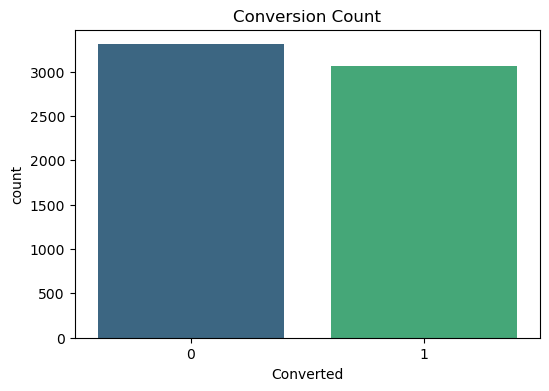

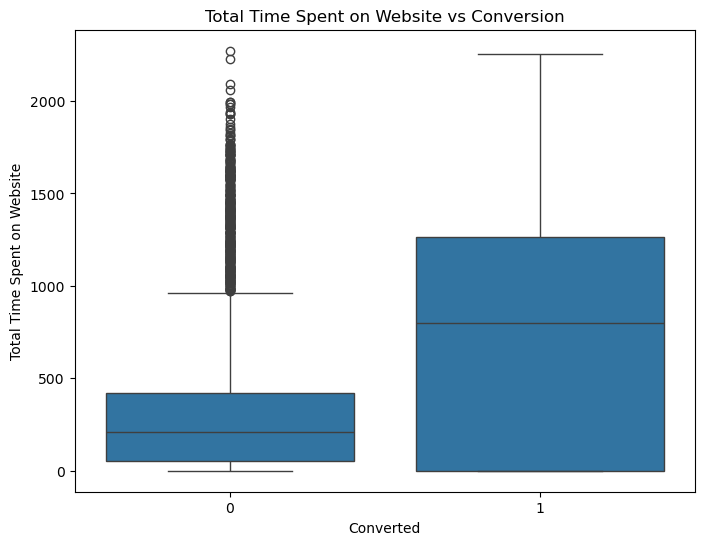

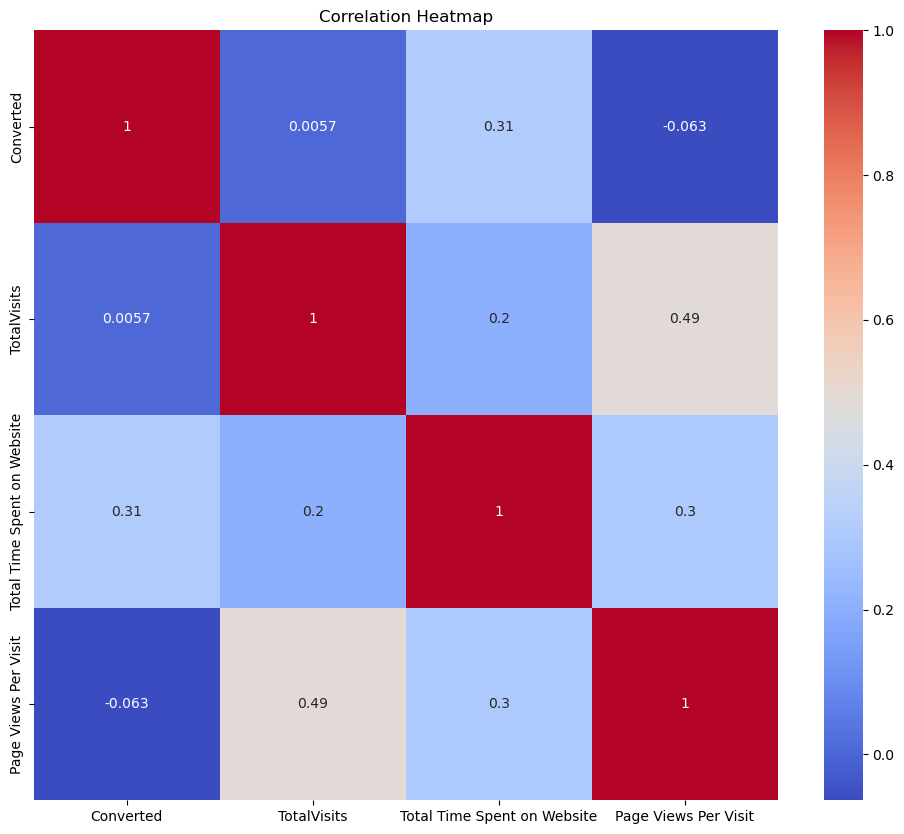

In [20]:
# Conversion rate
plt.figure(figsize=(6, 4))
sns.countplot(x='Converted', data=df, palette='viridis')
plt.title('Conversion Count')
plt.show()

# Time spent on website vs conversion
plt.figure(figsize=(8, 6))
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=df)
plt.title('Total Time Spent on Website vs Conversion')
plt.show()

# Heatmap for correlations
# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix for numeric columns only
corr_matrix = df[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Feature Engineering

### Encoding Categorical Variables

Converting categorical features into numerical using dummy encoding.

In [21]:
# Check the columns which are of type 'object'
temp = df.select_dtypes(include=['object'])
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [22]:
# Dummy variable creation for categorical variables
categorical_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                    'What is your current occupation', 'A free copy of Mastering The Interview',
                    'Last Notable Activity']
dummy = pd.get_dummies(df[categorical_cols], drop_first=True)
df = pd.concat([df, dummy], axis=1)

#### Dummy variable creation

In [23]:
# Check if categorical columns exist in the DataFrame before creating dummies
categorical_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                    'What is your current occupation', 'A free copy of Mastering The Interview',
                    'Last Notable Activity']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Missing')  # Handle missing values before creating dummies

# Create dummy variables
dummy = pd.get_dummies(df[categorical_cols], drop_first=True)
df = pd.concat([df, dummy], axis=1)


# Handle 'Specialization' separately due to a specific value 'Select'
specialization_dummies = pd.get_dummies(df['Specialization'], prefix='Specialization').drop('Specialization_Select', axis=1)
df = pd.concat([df, specialization_dummies], axis=1)

# Drop original categorical columns
df = df.drop(categorical_cols + ['Specialization'], axis=1)

## Splitting the Dataset

In [24]:
# Split the dataset into features and target variable
X = df.drop('Converted', axis=1)
y = df['Converted']

### Train-Test Split and Scaling
 Split the dataset into 70% train and 30% test

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### Scaling Features

In [26]:
# Scale numeric features
scaler = MinMaxScaler()
numeric_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [27]:
# correlation table

df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


## Model Development

### Recursive Feature Elimination (RFE)

1. **Initialize and Fit RFE**:

In [28]:
# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Apply RFE to select 15 features
rfe_selector = RFE(estimator=logreg, n_features_to_select=15)
rfe_selector = rfe_selector.fit(X_train, y_train)


2. **Extract Selected Features**:

In [29]:
# Extract selected features
selected_features = list(dict.fromkeys(X_train.columns[rfe_selector.support_]))

3. **Update X_train**:

In [30]:
# Subset the training data to only include selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

### Logistic Regression with Statsmodels

1. **Add Constant to Features**:

In [31]:
# Add constant for the intercept term
X_train_sm = sm.add_constant(X_train_selected)
X_test_sm = sm.add_constant(X_test_selected)

In [32]:
# Function to remove duplicate columns
def remove_duplicate_columns(df):
    df = df.loc[:, ~df.columns.duplicated()]
    return df

# Remove duplicate columns from X_train_sm
X_train_sm_unique = remove_duplicate_columns(X_train_sm)

# Check the data types after removing duplicates
print("X_train_sm data types after removing duplicates:\n", X_train_sm_unique.dtypes)

# Convert boolean columns to integers
bool_columns = X_train_sm_unique.select_dtypes(include=['bool']).columns
X_train_sm_unique[bool_columns] = X_train_sm_unique[bool_columns].astype(int)

# Ensure all columns in X_train_sm_unique are numeric
X_train_sm_unique = X_train_sm_unique.apply(pd.to_numeric, errors='coerce')

# Check for NaN values after conversion
print("NaN values in X_train_sm after conversion:\n", X_train_sm_unique.isnull().sum())

# Now you can proceed with fitting the model
# Ensure y_train is aligned with X_train_sm_unique
y_train = y_train.loc[X_train_sm_unique.index]

# Fit the model again
logm = sm.GLM(y_train, X_train_sm_unique, family=sm.families.Binomial())
result = logm.fit()
print(result.summary())

X_train_sm data types after removing duplicates:
 const                                                   float64
TotalVisits                                             float64
Total Time Spent on Website                             float64
Lead Origin_Lead Add Form                                  bool
Lead Source_Olark Chat                                     bool
Lead Source_Welingak Website                               bool
Do Not Email_Yes                                           bool
Last Activity_Had a Phone Conversation                     bool
Last Activity_SMS Sent                                     bool
What is your current occupation_Student                    bool
What is your current occupation_Working Professional       bool
Last Notable Activity_Had a Phone Conversation             bool
Last Notable Activity_Unreachable                          bool
What is your current occupation_Unemployed                 bool
dtype: object
NaN values in X_train_sm after conversio

3. **Check P-values and Drop Insignificant Variables**:

In [33]:
# Drop variables with p-value > 0.05 iteratively
X_train_sm = X_train_sm.drop(columns=['HighPValueColumn1', 'HighPValueColumn2'], errors='ignore')

# Remove duplicate columns
X_train_sm = X_train_sm.loc[:, ~X_train_sm.columns.duplicated()]

# Convert all bool columns to int
X_train_sm = X_train_sm.astype({col: 'int' for col in X_train_sm.select_dtypes(include=['bool']).columns})

# Check the data types of X_train_sm after conversion
print("X_train_sm data types after conversion:\n", X_train_sm.dtypes)

# Convert all columns in X_train_sm to numeric, coercing errors to NaN
X_train_sm = X_train_sm.apply(pd.to_numeric, errors='coerce')

# Check for NaN values in X_train_sm
print("NaN values in X_train_sm:\n", X_train_sm.isnull().sum())

# Drop rows with NaN values if necessary
X_train_sm = X_train_sm.dropna()

# Ensure y_train is numeric
y_train = pd.to_numeric(y_train, errors='coerce')

# Check for NaN values in y_train
if y_train.isnull().any():
    print("NaN values found in y_train. Please check the data.")
    # Optionally drop NaN values from y_train
    y_train = y_train.dropna()

# Ensure y_train has the same index as X_train_sm after dropping NaN rows
y_train = y_train.loc[X_train_sm.index]

# Fit the model again
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result = logm.fit()
print(result.summary())

X_train_sm data types after conversion:
 const                                                   float64
TotalVisits                                             float64
Total Time Spent on Website                             float64
Lead Origin_Lead Add Form                                 int32
Lead Source_Olark Chat                                    int32
Lead Source_Welingak Website                              int32
Do Not Email_Yes                                          int32
Last Activity_Had a Phone Conversation                    int32
Last Activity_SMS Sent                                    int32
What is your current occupation_Student                   int32
What is your current occupation_Working Professional      int32
Last Notable Activity_Had a Phone Conversation            int32
Last Notable Activity_Unreachable                         int32
What is your current occupation_Unemployed                int32
dtype: object
NaN values in X_train_sm:
 const                 

4. **Calculate Variance Inflation Factor (VIF)**:

In [34]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Features'] = X_train_sm.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
print(vif_data.sort_values(by='VIF', ascending=False))

# Drop variables with high VIF iteratively
X_train_sm = X_train_sm.drop(columns=['HighVIFColumn1'], errors='ignore')
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result = logm.fit()
print(result.summary())


                                             Features         VIF
0                                               const  183.286444
13         What is your current occupation_Unemployed   21.503577
10  What is your current occupation_Working Profes...   17.596560
9             What is your current occupation_Student    6.016426
7              Last Activity_Had a Phone Conversation    2.429406
11     Last Notable Activity_Had a Phone Conversation    2.425366
3                           Lead Origin_Lead Add Form    1.551000
5                        Lead Source_Welingak Website    1.297245
2                         Total Time Spent on Website    1.271415
4                              Lead Source_Olark Chat    1.244130
1                                         TotalVisits    1.125664
8                              Last Activity_SMS Sent    1.053403
6                                    Do Not Email_Yes    1.011512
12                  Last Notable Activity_Unreachable    1.004753
          

5. **Drop High VIF Variables**:

In [35]:
# Drop variables with high VIF iteratively
X_train_sm = X_train_sm.drop(columns=['HighVIFColumn1'], errors='ignore')
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result = logm.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2075.5
Date:                Tue, 26 Nov 2024   Deviance:                       4150.9
Time:                        17:56:56   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3652
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Evaluate Model on Training Data

1. **Predict Probabilities**:

In [36]:
# Predict probabilities on training data
y_train_pred = result.predict(X_train_sm)

2. **Create Prediction DataFrame**:

In [37]:
# Create a DataFrame with actual and predicted probabilities
y_train_pred_final = pd.DataFrame({'Actual': y_train, 'Predicted_Prob': y_train_pred})
y_train_pred_final['Predicted_Class'] = y_train_pred_final['Predicted_Prob'].apply(lambda x: 1 if x > 0.5 else 0)

3. **Confusion Matrix and Metrics**:

In [38]:
# Calculate confusion matrix
cm = confusion_matrix(y_train_pred_final['Actual'], y_train_pred_final['Predicted_Class'])
print("Confusion Matrix:\n", cm)

# Calculate accuracy
accuracy = accuracy_score(y_train_pred_final['Actual'], y_train_pred_final['Predicted_Class'])
print("Accuracy:", accuracy)

Confusion Matrix:
 [[1930  382]
 [ 563 1586]]
Accuracy: 0.7881640887693342


4. **Sensitivity and Specificity**:

In [39]:
# Calculate sensitivity and specificity
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.7380176826430898
Specificity: 0.8347750865051903


### Optimize Cutoff Using ROC Curve

1. **Plot ROC Curve**:

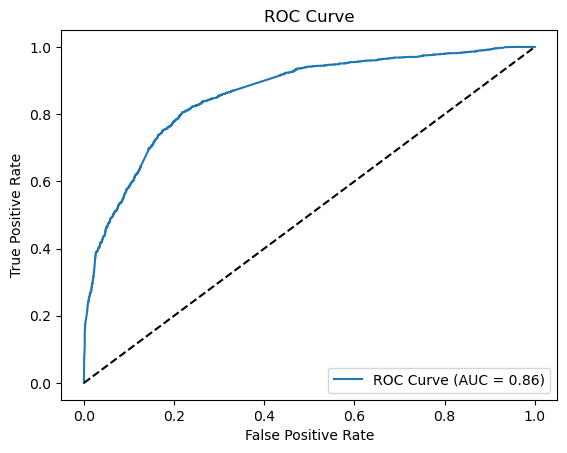

In [40]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
auc = roc_auc_score(y_train, y_train_pred)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

2. **Select Optimal Cutoff**:

In [41]:
# Evaluate metrics for different cutoffs
cutoff_df = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity'])
for threshold in thresholds:
    y_pred_class = (y_train_pred > threshold).astype(int)
    cm = confusion_matrix(y_train, y_pred_class)

    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    cutoff_df = pd.concat([cutoff_df, pd.DataFrame([[threshold, accuracy, sensitivity, specificity]],
                                                      columns=cutoff_df.columns)])

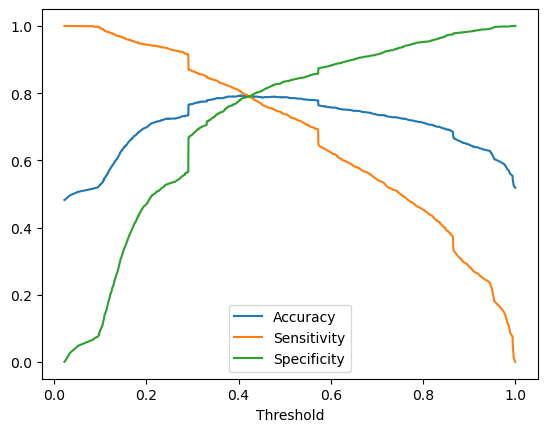

In [42]:
# Plot cutoff analysis
cutoff_df.plot(x='Threshold', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.show()

### Final Predictions on Test Data

1. **Transform Test Data**:

In [43]:
# Function to remove duplicate columns
def remove_duplicate_columns(df):
    # Get unique columns and keep the first occurrence
    df = df.loc[:, ~df.columns.duplicated()]
    return df

# Remove duplicate columns from training and test sets
X_train_unique = remove_duplicate_columns(X_train[selected_features])
X_test_unique = remove_duplicate_columns(X_test[selected_features])

# Check the columns of the training and test datasets
print("Unique Training features:", X_train_unique.columns.tolist())
print(50*"-")
print("Unique Test features:", X_test_unique.columns.tolist())
print(50*"-")

# Ensure that the test set has the same features as the training set
X_test_selected = X_test_unique.reindex(columns=X_train_unique.columns, fill_value=0)

# Check for any missing features
missing_features = set(X_train_unique.columns) - set(X_test_selected.columns)
print("Missing features in test set:", missing_features)
print(50*"-")

# Fit the scaler on the unique training set only
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_unique)
X_test_scaled = scaler.transform(X_test_selected)

# Add constant for the intercept term
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

Unique Training features: ['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent', 'What is your current occupation_Student', 'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Unreachable', 'What is your current occupation_Unemployed']
--------------------------------------------------
Unique Test features: ['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent', 'What is your current occupation_Student', 'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Unreachable', 'What is your current occupation_Unempl

2. **Predict and Evaluate**:

In [44]:
# Predict on test data
y_test_pred = result.predict(X_test_sm)
y_test_pred_final = (y_test_pred > 0.42).astype(int)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_final)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7850418410041841
